In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from paths import mkl_data
import requests # API library

import random
import time
import os

from isoweek import Week

import requests # API library

import numpy as np
import pandas as pd
import json
import re

import pyro
import pyro.distributions as dist
from pyro.contrib.autoguide import AutoDiagonalNormal, AutoMultivariateNormal
from pyro.infer import MCMC, NUTS, HMC, SVI, Trace_ELBO
from pyro.optim import Adam, ClippedAdam
from pyro.infer import Predictive

import torch

In [5]:
df_m1 = pd.read_csv('../df_matches_clean.csv')

In [6]:
#Dataframe Checks

#check if team wins are correct
foo = df_m1['team1_win'] + df_m1['team2_win']
foo.unique()

array([0], dtype=int64)

In [23]:
#Examples of queries

#Sort by date and time
df_matches_sorted = df_m1.sort_values(by=['week_date', 'match_time'])

#Get unique coach id's, winrate for each coach, and number of matches for each coach 
coach_id = pd.concat([df_m1['team1_coach_id'], df_m1['team2_coach_id']]).unique()
coach_winrates = np.zeros(len(coach_id))
coach_num_matches = np.zeros(len(coach_id))

for id, coach_id in enumerate(coach_id):
    coach1_df = df_m1[df_m1['team1_coach_id'] == coach_id]

    coach_winrates[id] += 0.5 * (coach1_df["team1_win"] == 0).sum()
    coach_winrates[id] += (coach1_df["team1_win"] == 1).sum()

    coach2_df = df_m1[df_m1['team2_coach_id'] == coach_id]
    coach_winrates[id] += 0.5 * (coach1_df["team2_win"] == 0).sum()
    coach_winrates[id] += (coach2_df["team2_win"] == 1).sum()

    coach_winrates[id] = coach_winrates[id] / (len(coach1_df) + len(coach2_df))
    coach_num_matches[id] = len(coach1_df) + len(coach2_df)

,winrate,total_coaches
count,4176.000000,4176.000000
mean,0.379445,45.590517
std,0.296530,109.717180
min,0.000000,1.000000
25%,0.111111,2.000000
50%,0.375000,9.000000
75%,0.571429,37.000000
max,1.000000,1412.000000


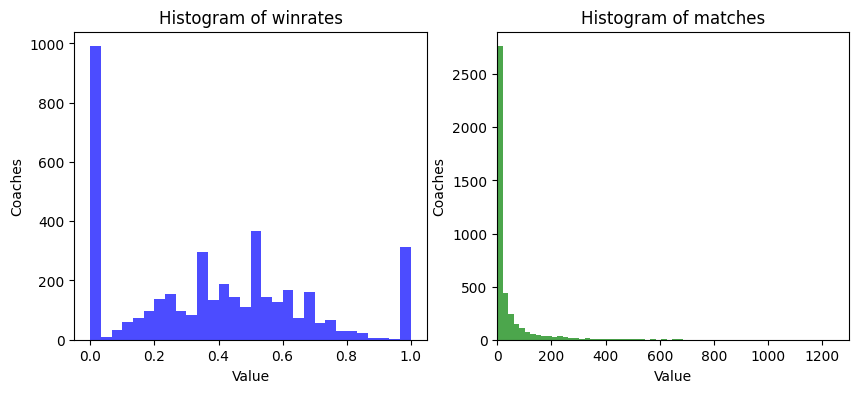

In [14]:
#Simple statistics and histograms
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(coach_winrates, bins=30, color='blue', alpha=0.7)
axs[0].set_title('Histogram of winrates')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Coaches')


# Plot histogram on the second subplot
axs[1].hist(coach_num_matches, bins=70, color='green', alpha=0.7)
axs[1].set_title('Histogram of matches')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Coaches')
axs[1].set_xlim([0, 1300])

# data = coach_num_matches[coach_winrates == 1]
# data2 = coach_num_matches[coach_winrates == 0]

df_descriptive = pd.DataFrame({'winrate': coach_winrates, 'total_coaches': coach_num_matches})
df_descriptive.describe()

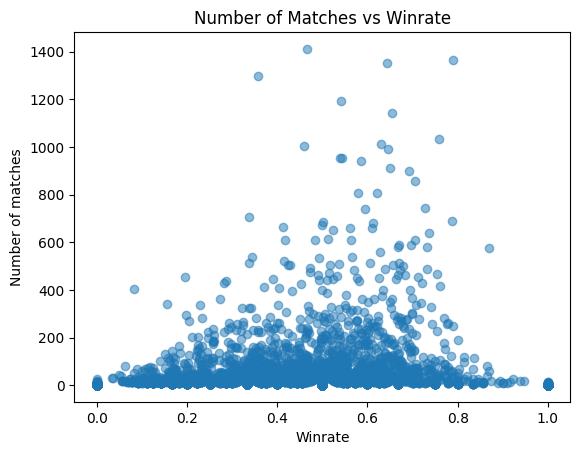

In [24]:
# plot number of games vs win rate
plt.scatter(coach_winrates, coach_num_matches, alpha=0.5)
plt.ylabel('Number of matches')
plt.xlabel('Winrate')
plt.title('Number of Matches vs Winrate')
plt.show()

